In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dl_portfolio.utils import optimal_target_vol_test

# Dataset 1

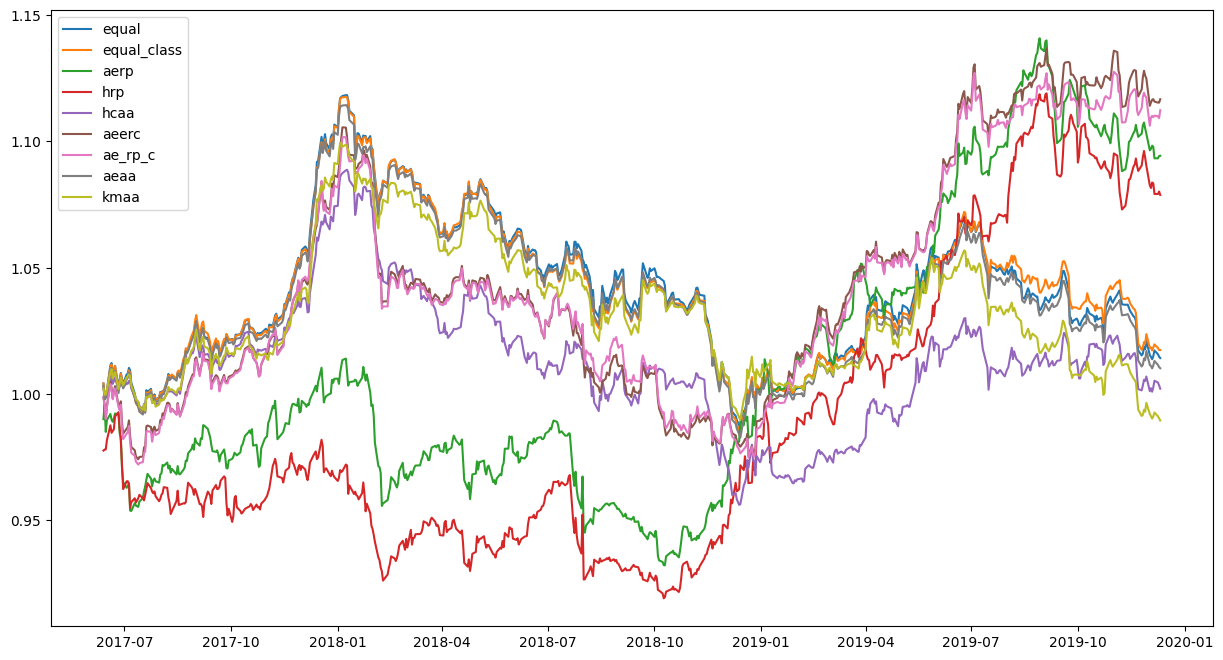

In [2]:
data = pd.read_csv("data/dataset1/dataset1.csv", index_col=0, parse_dates=True)
returns = data.pct_change(1).dropna()

perf_dir = "performance/val_log_convex_nmf_dataset1_VALIDATION_20230208_184115"
port_returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)
returns = returns.loc[port_returns.index[0]:]

plt.figure(figsize=(15,8))
plt.plot(np.cumprod(port_returns + 1))
plt.legend(port_returns.columns)

aerp -2.9596734831623643e-05


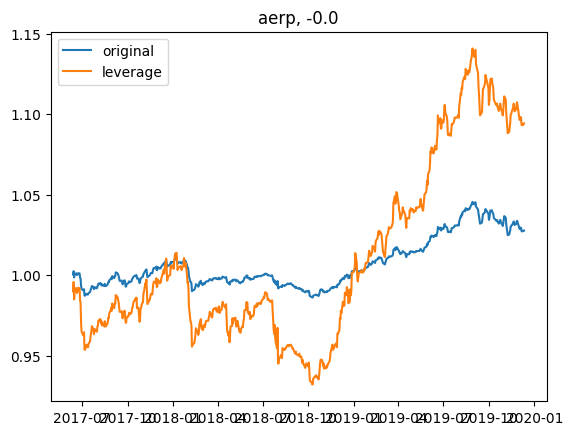

aeerc -1.7371969539874675e-05


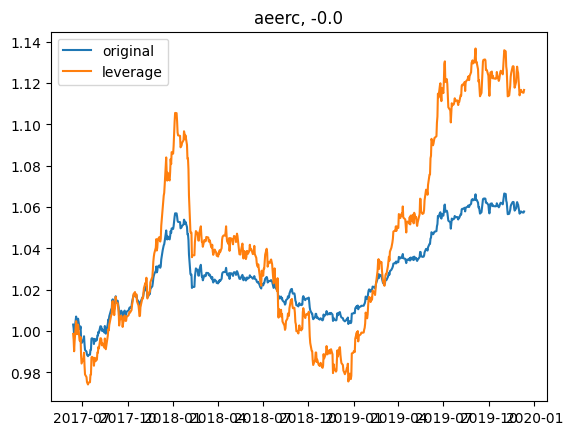

ae_rp_c -1.739785133945458e-05


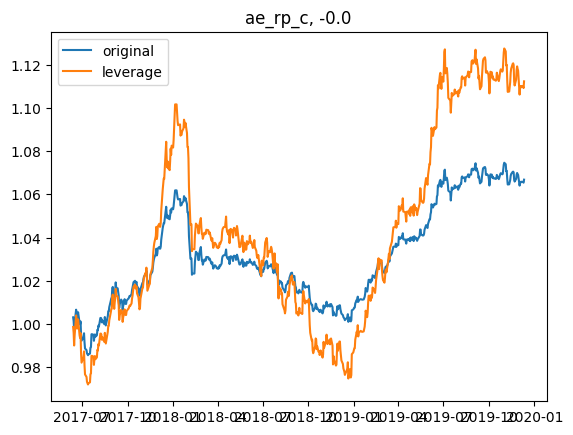

aeaa 3.618130695801007e-05


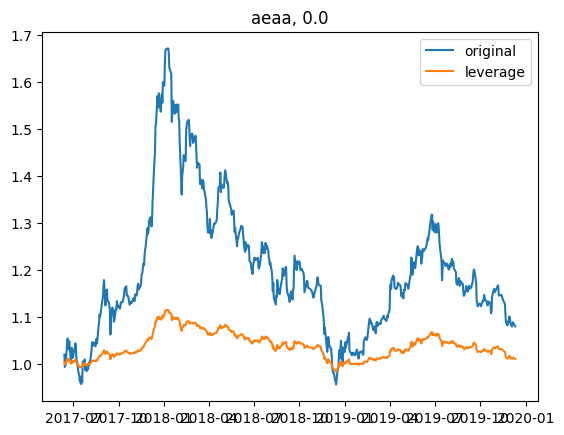

hrp -1.790508208668438e-05


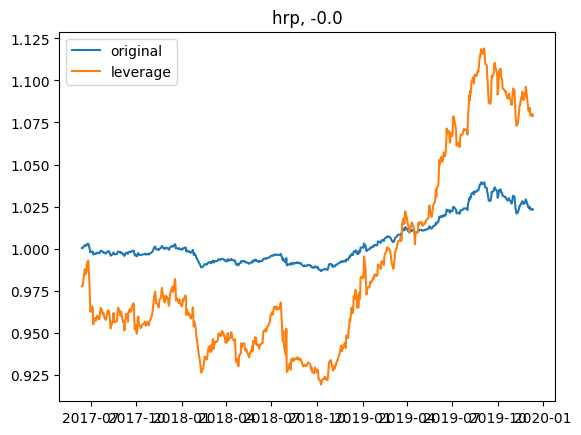

hcaa 0.00013533941690648497


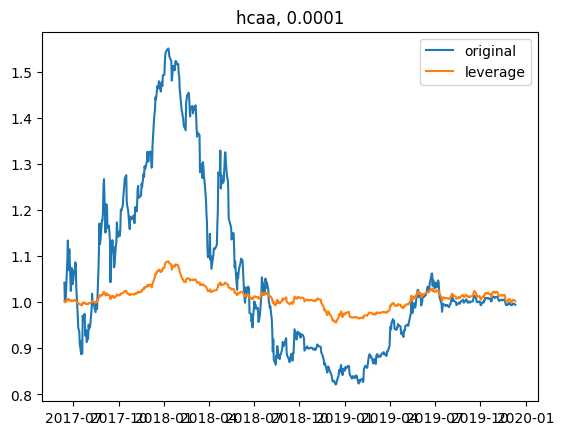

kmaa 0.0004404735833943118


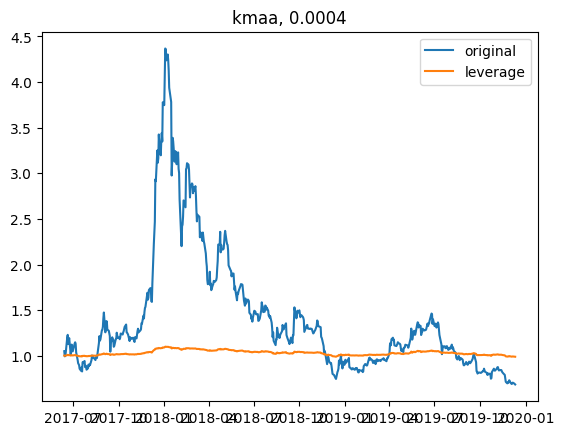

In [3]:
weights = pd.read_pickle(f"{perf_dir}/portfolios_weights.p")
for m in weights:
    weights[m] = weights[m].reindex(port_returns.index).fillna(method="ffill")
    
or_port_ret = pd.DataFrame()
for m in weights:
    or_port_ret[m] = (returns.loc[weights[m].index] * weights[m]).sum(1)

res = []
for m in or_port_ret:
    plt.plot(np.cumprod(or_port_ret[m] + 1), label="original")
    plt.plot(np.cumprod(port_returns[m] + 1), label="leverage")
    
    
    tvs = optimal_target_vol_test(or_port_ret[m])
    
    print(m, tvs)
    res.append([m, tvs])
    plt.title(f"{m}, {round(tvs, 4)}")
    plt.legend()
    
    plt.show()

In [4]:
res = [[r[0], "{:.2e}".format(r[1])] for r in res]
res


[['aerp', '-2.96e-05'],
 ['aeerc', '-1.74e-05'],
 ['ae_rp_c', '-1.74e-05'],
 ['aeaa', '3.62e-05'],
 ['hrp', '-1.79e-05'],
 ['hcaa', '1.35e-04'],
 ['kmaa', '4.40e-04']]

# Dataset 2

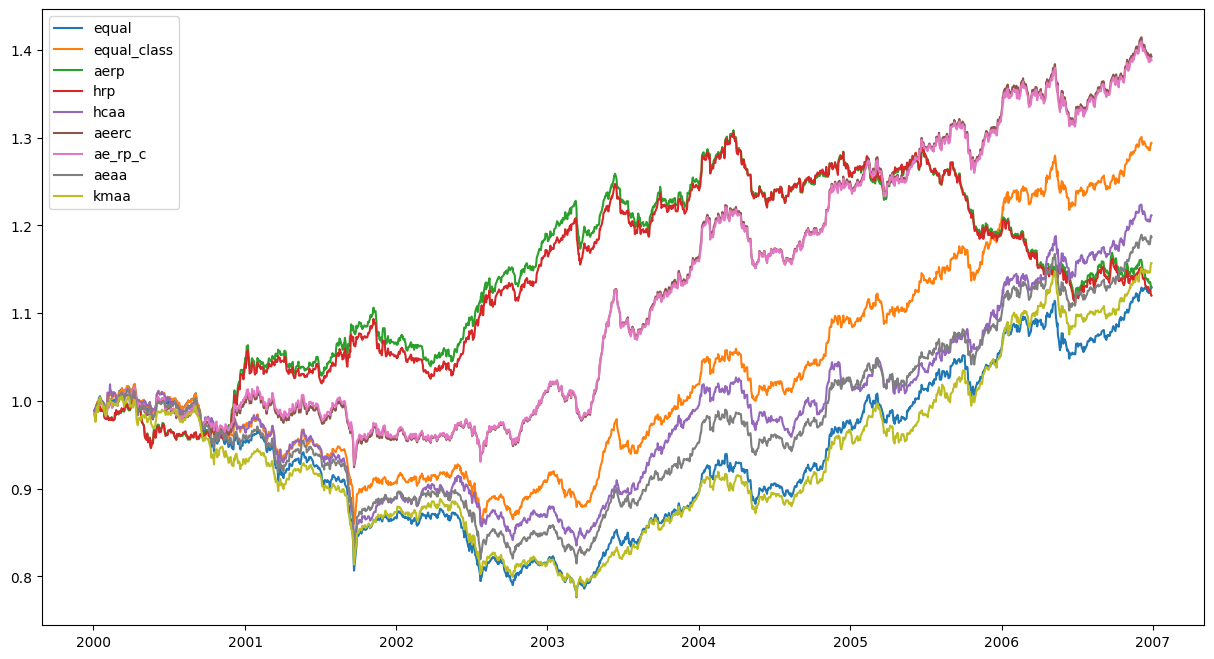

In [5]:
data = pd.read_csv("data/dataset2/dataset2.csv", index_col=0, parse_dates=True)
returns = data.pct_change(1).dropna()

perf_dir = "performance/val_log_convex_nmf_dataset2_VALIDATION_20230208_190107"
port_returns = pd.read_csv(f"{perf_dir}/portfolios_returns.csv", index_col=0, parse_dates=True)
returns = returns.loc[port_returns.index[0]:]

plt.figure(figsize=(15,8))
plt.plot(np.cumprod(port_returns + 1))
plt.legend(port_returns.columns)

aerp -1.5627922037426333e-06


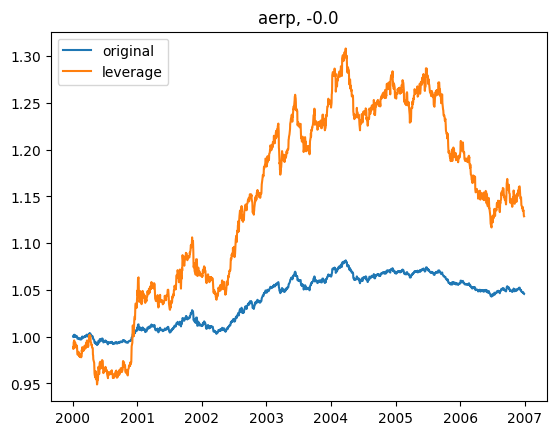

aeerc -1.1935942676728403e-05


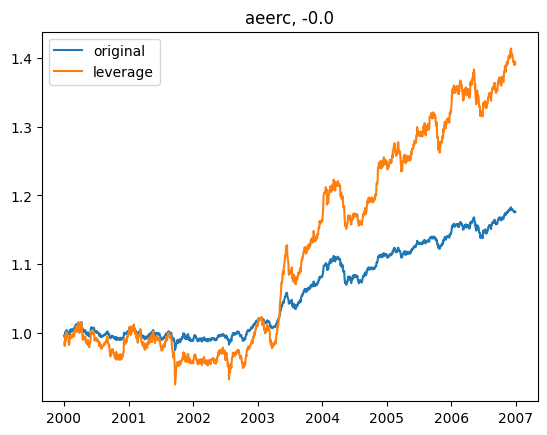

ae_rp_c -1.1198780658452858e-05


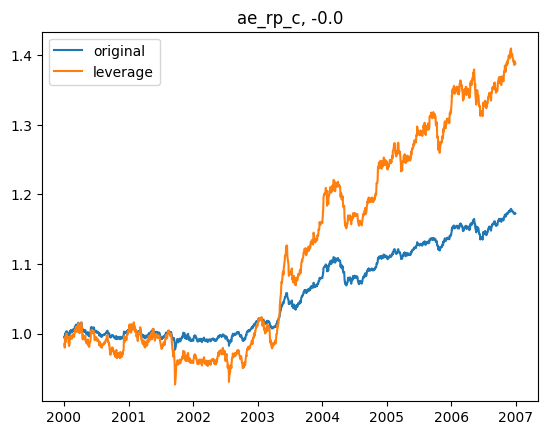

aeaa -2.396721379658135e-06


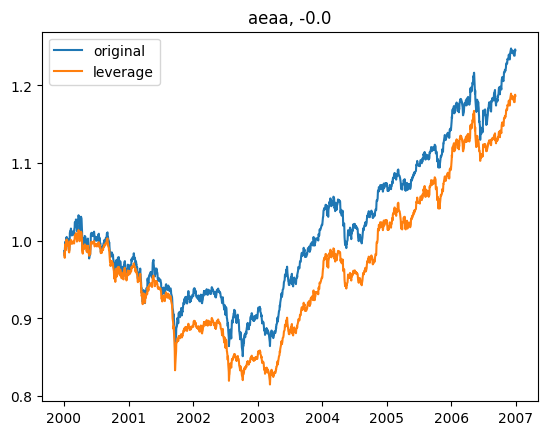

hrp -6.793114678378327e-07


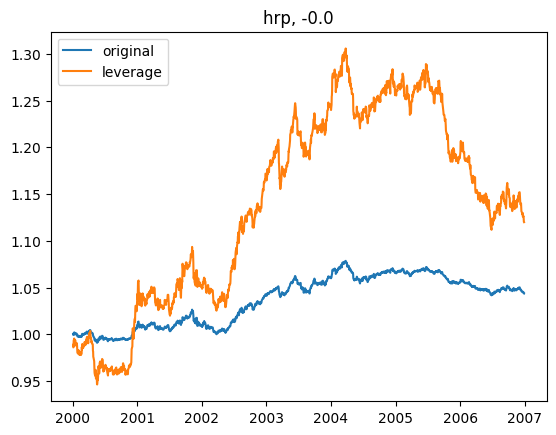

hcaa -2.0380755271219814e-05


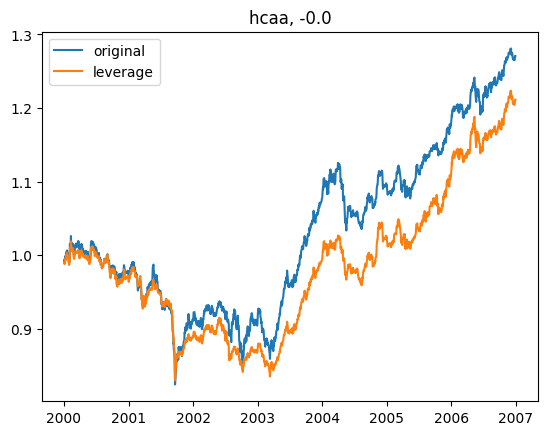

kmaa -4.722190410348159e-05


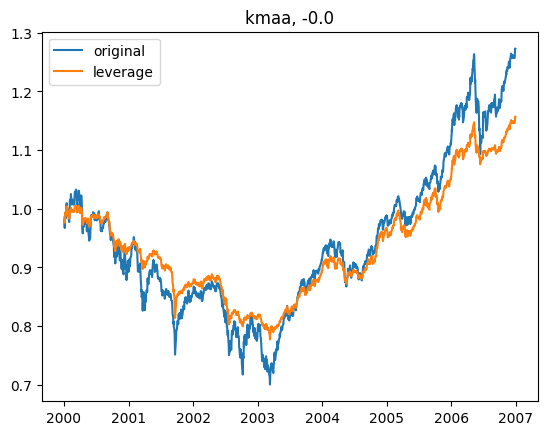

In [6]:
weights = pd.read_pickle(f"{perf_dir}/portfolios_weights.p")
for m in weights:
    weights[m] = weights[m].reindex(port_returns.index).fillna(method="ffill")
    
or_port_ret = pd.DataFrame()
for m in weights:
    or_port_ret[m] = (returns.loc[weights[m].index] * weights[m]).sum(1)

res = []
for m in or_port_ret:
    plt.plot(np.cumprod(or_port_ret[m] + 1), label="original")
    plt.plot(np.cumprod(port_returns[m] + 1), label="leverage")
    
    
    tvs = optimal_target_vol_test(or_port_ret[m])
    
    print(m, tvs)
    res.append([m, tvs])
    plt.title(f"{m}, {round(tvs, 4)}")
    plt.legend()
    
    plt.show()

In [7]:
res = [[r[0], "{:.2e}".format(r[1])] for r in res]
res


[['aerp', '-1.56e-06'],
 ['aeerc', '-1.19e-05'],
 ['ae_rp_c', '-1.12e-05'],
 ['aeaa', '-2.40e-06'],
 ['hrp', '-6.79e-07'],
 ['hcaa', '-2.04e-05'],
 ['kmaa', '-4.72e-05']]